# Problemas de Advección

## Método de los Volúmenes Finitos

<div class="alert alert-block alert-info">
Are you curious to find out why the finite-volume method (FVM) is the <b>most popular method</b> in computational fluid dynamics? In fact, almost all of the commercial CFD software packages are based on the finite-volume discretization. Here are some reasons:
<br>
<br>
<li>FVM discretizations are very general and have no requirement that the grid be structured, like in the finite-difference method. This makes FVM very <i>flexible</i>.</li>
<br>
<li>FVM gives a <i>conservative discretization</i> automatically by using directly the conservation laws in integral form.</li>
</div>

### Discretizacion Conservativa

Regresemos al comienzo del presente modulo, cuando explicamos las leyes de conservacion observando un volumen de control como el mostrado en la figura. A fin de simplificar el abordaje del problema, solo hemos considerado el flujo en una dimension, con velocidad $u$:

![1Dcontrolvolume](./figuras/1Dcontrolvolume.png)

La ley de conservacion de la masa establece que la velocidad de cambio de masa en el volumen de control, mas el flujo neto de masa a traves de las superficies de control debe ser cero.
Una ley de conservacion general para una cantidad $e$ se escribe entonces como:

$$
\begin{equation}
\frac{\partial}{\partial t}\int_{\text{cv}}e \, dV + \oint_{\text{cs}}\vec{F}\cdot d\vec{A} =0
\end{equation}
$$

donde $\vec{F}$ es el flujo, y $\text{cv}$ denota el volumen de control cuya superficie de control es $\text{cs}$.

**Porque no hacer el volumen de control por si mismo nuestra celda computacional?**

Imaginemos que dividimos el dominio de interes 1D empleando puntos de grilla $x_i$. Pero en lugar de procurar el calculo de valores locales en los puntos de grilla, queremos seguir la evolucion temporal de valores *promedio* dentro de cada celda 1D de longitud $\Delta x$ con centro en $x_i$.

Definimos $e_i$ como la integral promedio a traves del pequeño volumen de control en la celda con centro en $x_i$.

$$
\begin{equation}
e_i = \frac{1}{\Delta x} \int_{x_i - \Delta x / 2}^{x_i + \Delta x / 2} e(x, t) \, dx.
\end{equation}
$$

Si conocemos los terminos de flujo en las fronteras del volumen de control, las cuales se ubican en $x_{i-1/2}$ y $x_{i+1/2}$, la ley de conservacion general para este pequeño volumen de control sera:

$$
\begin{equation}
\frac{\partial}{\partial t} e_i + \frac{1}{\Delta x} \left[ F \left( x_{i+1/2}, t \right) - F \left( x_{i - 1 / 2}, t \right) \right] = 0.
\end{equation}
$$ 

Esto ahora solo requiere un esquema de avance en el tiempo, y resulta facil de obtener *si* podemos encontrar $F$ en las superficies de control.

![finite volume](./figuras/finite_volume.png)

#### Discretizando un dominio 1D en volumenes finitos.

Hemos visto con el modelo de trafico que el flujo depende de la cantidad conservada (en aquel caso, la densidad de trafico). Este es generalmente el caso, por lo tanto escribimos $F = F(e)$. Necesitaremos aproximar los terminos de flujo en los bordes de las celdas (superficies de control) para los promedios integrales $e_i$.

Hemos visto en cuadernos anteriores que el esquema hacia atras en espacio es de primer orden y el error introduce difusion numerica. Recordemos ademas que al procurar aplicarlo al [modelo de trafico no lineal](./03_01_LeyConservacion.ipynb) en el problema del semaforo obteniamos *explosion* en la solucion! La causa de este comportamiento se debe a que el problema contiene ondas que viajan en ambas direcciones (izquierda y derecha). 

A fin de sortear esta dificultad, hemos elegido condiciones iniciales que no produzcan ondas con velocidad negativa ... Sin embargo, una solucion genuina seria disponer de un esquema que sea capaz de tratar ondas con velocidades tanto positivas como negativas! Aqui **Godunov** entra en juego.

### Metodo de Godunov

Godunov ha propuesto un metodo de primer orden que emplea la forma integral de las leyes de conservacion y una representacion de la solucion definida por tramos tipo constante (*piecewise constant*) como ilustra la figura anterior. Notamos que esta representacion equivale a tener multiples *choques* en las fronteras de cada celda (superficies de control).

Para cada superficie de control, tenemos 2 valores para la solucion $e$ en un dado instante de tiempo: el valor constante que viene de la izquierda $e_L$, y el valor constante que viene de la derecha $e_R$. La situacion para la cual se dispone de una ley de conservacion junto con una condicion inicial constante que presenta una discontinuidad (*jump*) se denomina **problema de Riemann**. 

El problema de Riemann tiene solucion exacta para las ecuaciones de Euler. El tubo de choque (*shock-tube*) --dispositivo ideal que genera una onda de choque 1D en un gas compresible-- constituye un ejemplo de un problema de Riemann! Y puesto que admite solucion analitica, podemos emplearlo para estimar la precision de metodos numéricos.

Godunov tuvo la siguiente idea: considerando que la solucion se representa definida por tramos, podria usarse la solucion analitica del problema de Riemann en cada frontera de celda! Luego, podremos reconstruir la solucion global a partir de la union de todas las soluciones de Riemann.

La siguiente figura ilustra un problema de Riemann para las ecuaciones de Euler, asociado al tubo de choque. El grafico espacio-tiempo muestra las curvas caracteristicas para la onda de expansion que viaja hacia la izquierda, y la discontinuidad o *choque* que viaja hacia la derecha.

![Riemann-shocktube](./figuras/Riemann-shocktube.png)

Requerimos resolver un numero de problemas de Riemann desde $t$ hasta $t + \Delta t$, uno en cada frontera de celda (como se ilustra en la siguiente figura). El flujo numerico en $x_{i+1/2}$ es 

$$
\begin{equation}
F_{i+1/2}= \frac{1}{\Delta t} \int_{t^n}^{t^{n+1}} F\left(e(x_{i+1/2},t) \right)\,dt
\end{equation}
$$

A fin de ser capaces de resolver cada problema de Riemann en forma independiente, los mismos no deberian interactuar, lo cual impone un limite en $\Delta t$. Observando la siguiente figura, podriamos concluir que requerimos un numero CFL de 1/2 para evitar tales interacciones, pero el flujo numerico escrito arriba solo depende del estado en $x_{i+1/2}$, por lo tanto no habra interaccion siempre que la solucion alli no se vea afectada por la correspondiente en $x_{i-1/2}$. Esto es, el limite CFL es realmente 1.

![many_Rieman_problems](./figuras/many_Rieman_problems.png)

#### Problemas de Riemann en cada borde de celda.

Godunov ha resuelto el problema de Riemann en forma exacta, sin embargo muchos autores posteriores han propuesto soluciones de Riemann *aproximadas*. Podriamos imaginar una aproximacion simple del flujo en un borde de celda a traves de un promedio entre los valores situados a la izquierda y derecha, por ejemplo: $\frac{1}{2}\left[F(e_L)+F(e_R)\right]$, pero esto conduce a un esquema centrado y el metodo seria inestable. Agregar un termino proporcional a la diferencia entre estados situados a la izquierda y derecha, $e_R-e_L$, otorga disipacion artificial y brinda estabilidad (ver referencia de **van Leer et al., 1987**).

Una formula para el flujo numerico en $x_{i+1/2}$ denominado flujo *Rusanov*, o flujo *Lax-Friedrichs*, esta dado por

$$
\begin{equation}
F_{i+1/2}= \frac{1}{2} \left[ F \left( e_L \right) + F \left( e_R \right)  \right] - \frac{1}{2}  \max \left|F'(e)\right| \left( e_R - e_L \right)
\end{equation}
$$

donde $F'(e)$ es el Jacobiano de la funcion flujo y $\max\left|F'(e)\right|$ es la velocidad de propagacion local de la onda viajera mas rapida. Las soluciones de Riemann en cada borde de celda **no** interactuan si $\max|F'(e)|\leq\frac{\Delta x}{\Delta t}$, lo cual conduce a una formula de flujo que ahora podemos usar:

$$
\begin{equation}
F_{i+1/2}= \frac{1}{2} \left( F \left( e_{i} \right) + F \left( e_{i+1} \right) - \frac{\Delta x}{\Delta t} \left( e_{i+1} - e_{i} \right) \right)
\end{equation}
$$

### A probarlo!

In [6]:
import numpy
from matplotlib import pyplot, animation
from IPython.display import HTML
%matplotlib inline

In [7]:
# Set the font family and size to use for Matplotlib figures.
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

Apliquemos el metodo de Godunov al [modelo de trafico](./03_01_LeyConservacion.ipynb). 
En el [cuaderno 2](./03_02_EsquemasConveccion.ipynb) hemos escrito funciones que permiten establecer las condiciones iniciales para el problema del semaforo y calcular los flujos. A fin de evitar la re-escritura de las mismas, hemos guardado tales funciones en un archivo Python llamado `traffic.py` (situado en el directorio actual). Entonces, es posible ahora emplear tales funciones importandolas de manera similar a lo efectuado con NumPy o cualquier otra libreria:

In [8]:
from traffic import rho_red_light, flux

El comando `help` nos permite acceder a una descripcion detallada para una funcion dada. La misma consta de explicaciones las cuales se agregan como comentarios (*docstrings*) a continuacion de la definicion de la funcion:

In [9]:
help(rho_red_light)

Help on function rho_red_light in module traffic:

rho_red_light(x, rho_max)
    Computes the "red light" initial condition with shock.
    
    Parameters
    ----------
    x : numpy.ndarray
        Locations on the road as a 1D array of floats.
    rho_max : float
        The maximum traffic density allowed.
    
    Returns
    -------
    rho : numpy.ndarray
        The initial car density along the road as a 1D array of floats.



Ahora, establecemos los parametros del calculo:

In [16]:
# Set parameters.
nx = 100  # number of cells along the road
L = 4.0  # length of the road
dx = L / nx  # cell width
nt = 30  # number of time steps to compute
rho_max = 10.0  # maximum traffic density allowed
u_max = 1.0  # speed limit

# Get the grid-cell centers.
# x_i is now the center of the i-th cell.
x = numpy.linspace(0.0 + 0.5 * dx, L - 0.5 * dx, num=nx)

# Compute the initial traffic density.
rho0 = rho_red_light(x, rho_max)

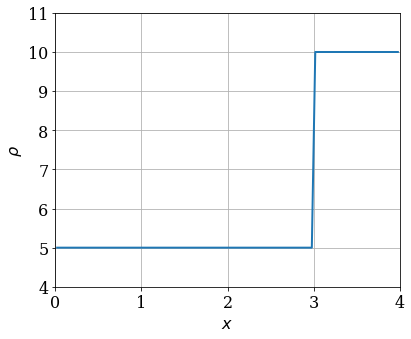

In [17]:
# Plot the initial car density on the road.
fig = pyplot.figure(figsize=(6.0, 5.0))
pyplot.xlabel(r'$x$')
pyplot.ylabel(r'$\rho$')
pyplot.grid()
line = pyplot.plot(x, rho0,
                   color='C0', linestyle='-', linewidth=2)[0]
pyplot.xlim(0.0, L)
pyplot.ylim(4.0, 11.0)
pyplot.tight_layout();

A continuacion se escribe una funcion nueva que aplica el metodo de Godunov con los flujos de *Lax-Friedrichs*:

In [18]:
def godunov(rho0, nt, dt, dx, bc_values, *args):
    """
    Computes and returns the history of the traffic density
    on the road using a Godunov scheme
    with a Lax-Friedrichs flux.
    
    Parameters
    ----------
    rho0 : numpy.ndarray
        The initial traffic density along the road
        as a 1D array of floats.
    nt : integer
        The number of time steps to compute.
    dt : float
        The time-step size to integrate.
    dx : float
        The distance between two consecutive locations.
    bc_values : tuple or list
        The value of the density at the first and last locations
        as a tuple or list of two floats.
    args : list
        Positional arguments to be passed to the flux function.
    
    Returns
    -------
    rho_hist : list of numpy.ndarray objects
        The history of the car density along the road
        as a list of 1D arrays of floats.
    """
    rho_hist = [rho0.copy()]
    rho = rho0.copy()
    for n in range(nt):
        rhoL = rho[:-1]  # i-th value at index i-1/2
        rhoR = rho[1:]  # i+1-th value at index i-1/2
        # Compute the flux at cell boundaries.
        F = 0.5 * (flux(rhoL, *args) + flux(rhoR, *args) -
                   dx / dt * (rhoR - rhoL))
        # Advance in time.
        rho[1:-1] = rho[1:-1] - dt / dx * (F[1:] - F[:-1])
        # Apply boundary conditions.
        rho[0], rho[-1] = bc_values
        # Record the time-step solution.
        rho_hist.append(rho.copy())
    return rho_hist

Para comenzar empleamos un numero CFL de $1$, pero deberiamos experimentar tambien con otros valores:

In [19]:
# Set time-step size based on CFL limit.
sigma = 1.0
dt = sigma * dx / u_max  # time-step size

# Compute the traffic density at all time steps.
rho_hist = godunov(rho0, nt, dt, dx, (rho0[0], rho0[-1]),
                   u_max, rho_max)

In [20]:
def update_plot(n, rho_hist):
    """
    Update the line y-data of the Matplotlib figure.
    
    Parameters
    ----------
    n : integer
        The time-step index.
    rho_hist : list of numpy.ndarray objects
        The history of the numerical solution.
    """
    fig.suptitle('Time step {:0>2}'.format(n))
    line.set_ydata(rho_hist[n])

In [21]:
# Create an animation of the traffic density.
anim = animation.FuncAnimation(fig, update_plot,
                               frames=nt, fargs=(rho_hist,),
                               interval=100)
# Display the video.
HTML(anim.to_jshtml())

Vemos que el resultado luce semejante al metodo de Lax-Friedrichs original, puesto que en ambos casos empleamos una grilla uniforme. En la aproximacion de volumenes finitos, el uso de la forma integral de las ecuaciones nos permite emplear un espacio **variable** entre puntos de la grilla.

El metodo **original** de Godunov tiene una precision de primer orden, debido a que el mismo representa la cantidad conservada por medio de una funcion definida por tramos tipo constante (*piecewise constant*). Esta es la razon por la cual observamos considerable difusion numerica en la solucion.
Modificaciones posteriores a la version original permitieron desarrollar metodos "alta resolucion" los cuales ofrecen precision de orden igual o mayor a 2.

##### Dig deeper

<div class="alert alert-block alert-success">
            
<li>Godunov's method works in problems having waves moving with positive or negative wave speeds. Try it on the green-light problem introduced in <a href="./03_01_LeyConservacion.ipynb">cuaderno 1</a> using the initial condition containing waves traveling in both directions.</li>
            
<li>Investigate two or three different numerical flux schemes (you can start with van Leer et al., 1987, or Google for other references). Implement the different flux schemes and compare!</li>
</div>

## Esquemas MUSCL

El metodo de Godunov tiene una precision de primer orden, el cual hemos visto no resulta apropiado para leyes de conservacion de tipo hiperbolico, a causa de la elevada difusion numerica. Esta caracteristica otorga una dificultad particular en las cercanias de gradientes bruscos en la solucion.

Una mejora a la version original se logra reemplazando la representacion de la solucion definida por tramos tipo constante (*piecewise constant*) por una representacion tipo lineal (*piecewise lineal*), la cual sigue siendo discontinua en los bordes. Esto conduce al esquema MUSCL (*Monotonic Upstream-Centered Scheme for Conservation Laws*), inventado por van Leer (1979).

### Reconstruccion en espacio

La reconstruccion por tramos tipo lineal (*piecewise linear*) consiste en representar la solucion dentro de cada celda por una *linea recta* como se ilustra en la siguiente figura. Entonces definimos:

$$
\begin{equation}
e(x) = e_i + \sigma_i (x - x_i).
\end{equation}
$$

donde $\sigma_i$ es la *pendiente* de la aproximacion dentro de la celda, mientras que $e_i$ es el promedio de celda de Godunov. Mediante la asignacion $\sigma_i=0$ se obtiene el metodo de Godunov.

Considerando diferencias centradas tendremos:

$$
\begin{equation}
\sigma_i = \frac{e_{i+1} - e_{i-1}}{2 \Delta x}.
\end{equation}
$$

<img src="./figuras/cell_boundaries.svg">

#### Aproximacion de la solucion por tramos tipo lineal.

Pero vimos en los resultados del [cuaderno 2](./03_02_EsquemasConveccion.ipynb) que tal esquema puede conducir a oscilaciones en las cercanias de choques. Estas [oscilaciones de Gibbs](http://en.wikipedia.org/wiki/Gibbs_phenomenon) siempre apareceran de acuerdo al [teorema de Godunov](http://en.wikipedia.org/wiki/Godunov's_theorem) a menos que empleemos una reconstruccion constante. Por consiguiente debemos modificar, o *limitar* la pendiente cerca de los choques.

La forma mas simple de limitar es calcular pendientes de un lado:

$$
\begin{equation}
\Delta e^- = \frac{e_i - e_{i-1}}{\Delta x}, \quad \Delta e^+ = \frac{e_{i+1} - e_{i}}{\Delta x}, 
\end{equation}
$$

<img src="./figuras/calc_sigma.svg">

Ahora construimos la pendiente *minmod*:

$$
\begin{align}
  \sigma_i & = \text{minmod}(\Delta e^-, \Delta e^+) 
  = \begin{cases} \min(\Delta e^-, \Delta e^+) & \text{ if } \Delta e^-, \Delta e^+ > 0 \\
  \max(\Delta e^-, \Delta e^+) & \text{ if } \Delta e^-, \Delta e^+ < 0 \\
0 & \text{ if } \Delta e^- \cdot \Delta e^+ \leq 0
  \end{cases}
\end{align}
$$

Esto es, empleamos aquella pendiente de un lado *mas pequeña* en magnitud, a menos que ambas pendientes tengan diferente signo en cuyo caso adoptamos la reconstruccion constante (es decir, el metodo de Godunov).

Luego podemos usar la pendiente *minmod* para obtener los valores en las interfaces entre celdas:

$$
\begin{align}
e^{R}_{i-1/2} &= e_i - \sigma_i \frac{\Delta x}{2}\\
e^{L}_{i+1/2} &= e_i + \sigma_i \frac{\Delta x}{2}
\end{align}
$$

donde $e^R$ y $e^L$ son los valores interpolados locales de la cantidad conservada ubicados inmediatamente a la derecha y a la izquierda de la frontera de celda, respectivamente.

##### Nota acerca de los Indices

Notemos que para la celda con indice $i$, calculamos $e^R_{i-1/2}$ y $e^L_{i+1/2}$. Vemos en la figura anterior que se trata de valores locales de la solucion ubicados en bordes opuestos de la celda.

Sin embargo, al calcular el flujo local en los bordes de celda, empleamos el valor de la solucion a cada lado de la frontera:

$$
\begin{equation}
F_{i+1/2} = f(e^L_{i+1/2}, e^R_{i+1/2})
\end{equation}
$$

Tendremos entonces 2 vectores de flujo: uno que corresponde a la frontera izquierda y otro correspondiente a la frontera derecha!

Aqui escribimos una funcion Python que implementa *minmod*.

In [22]:
def minmod(e, dx):
    """
    Computes the minmod approximation of the slope.
    
    Parameters
    ----------
    e : list or numpy.ndarray
        The input values as a 1D array of floats.
    dx : float
        The grid-cell width.
    
    Returns
    -------
    sigma : numpy.ndarray
        The minmod-approximated slope
        as a 1D array of floats.
    """
    sigma = numpy.zeros_like(e)
    for i in range(1, len(e) - 1):
        de_minus = (e[i] - e[i - 1]) / dx
        de_plus = (e[i + 1] - e[i]) / dx
        if de_minus > 0 and de_plus > 0:
            sigma[i] = min(de_minus, de_plus)
        elif de_minus < 0 and de_plus < 0:
            sigma[i] = max(de_minus, de_plus)
        else:
            sigma[i] = 0.0
    return sigma

### Evolucion en tiempo

Puesto que aspiramos a lograr una precision de segundo orden en espacio, podriamos dirigir nuestra atencion a disponer de una precision de segundo orden en tiempo. En principio, requerimos un metodo que evolucione la ecuacion diferencial *ordinaria* hacia adelante en tiempo:

$$
\begin{equation}
  \frac{\partial}{\partial t} e_i + \frac{1}{\Delta x} \left[ F \left( x_{i+1/2}, t \right) - F \left( x_{i - 1 / 2}, t \right) \right] = 0
\end{equation}
$$

Un metodo de Runge-Kutta de orden 2 con caracteristicas especiales (debido a Shu & Osher, 1988) brinda el siguiente esquema:

$$
\begin{align}
e^*_i & = e^n_i + \frac{\Delta t}{\Delta x}\left( F^n_{i-1/2} - F^n_{i+1/2} \right) \\
e^{n+1}_i & = \frac{1}{2} e^n_i + \frac{1}{2}\left( e^*_i + \frac{\Delta t}{\Delta x}\left( F^*_{i-1/2} - F^*_{i+1/2} \right) \right)
\end{align}
$$

Recordemos que el flujo de Rusanov se define como
                          
$$
F_{i+1/2}= \frac{1}{2} \left[ F \left( e_L \right) + F \left( e_R \right)  \right] -  \frac{1}{2}  \max \left|F'(e)\right| \left( e_R - e_L \right)
$$

Teniendo en cuenta los valores interpolados de $e$ en las fronteras de celda podremos generar un flujo de Rusanov de mayor orden de precision. En la frontera de celda situada en $i+1/2$, por ejemplo:

$$
\begin{equation}
F_{i+1/2} = \frac{1}{2} \left( F \left( e^L_{i+1/2} \right) + F \left( e^R_{i+1/2} \right)   -  \frac{\Delta x}{\Delta t} \left( e^R_{i+1/2} - e^L_{i+1/2} \right) \right)
\end{equation}
$$

Ahora estamos listos para correr el esquema MUSCL!

In [23]:
def muscl(rho0, nt, dt, dx, bc_values, *args):
    """
    Computes and returns the history of the traffic density
    on the road using a MUSCL scheme with a minmod slope limiting
    and a Lax-Friedrichs flux.
    The function uses a second-order Runge-Kutta method
    to integrate in time.
    
    Parameters
    ----------
    rho0 : numpy.ndarray
        The initial traffic density along the road
        as a 1D array of floats.
    nt : integer
        The number of time steps to compute.
    dt : float
        The time-step size to integrate.
    dx : float
        The distance between two consecutive locations.
    bc_values : tuple or list
        The value of the density at the first and last locations
        as a tuple or list of two floats.
    args : list
        Positional arguments to be passed to the flux function.
    
    Returns
    -------
    rho_hist : list of numpy.ndarray objects
        The history of the car density along the road
        as a list of 1D array of floats.
    """
    def compute_flux(rho):
        # Compute the minmod slope.
        sigma = minmod(rho, dx)
        # Reconstruct values at cell boundaries.
        rhoL = (rho + sigma * dx / 2.0)[:-1]
        rhoR = (rho - sigma * dx / 2.0)[1:]
        # Compute the flux.
        F = 0.5 * (flux(rhoL, *args) + flux(rhoR, *args) -
                   dx / dt * (rhoR - rhoL))
        return F
    rho_hist = [rho0.copy()]
    rho = rho0.copy()
    rho_star = rho.copy()
    for n in range(nt):
        # Compute the flux at cell boundaries.
        F = compute_flux(rho)
        # Perform 1st step of RK2.
        rho_star[1:-1] = rho[1:-1] - dt / dx * (F[1:] - F[:-1])
        # Apply boundary conditions.
        rho_star[0], rho_star[-1] = bc_values
        # Compute the flux at cell boundaries.
        F = compute_flux(rho_star)
        # Perform 2nd step of RK2.
        rho[1:-1] = 0.5 * (rho[1:-1] + rho_star[1:-1] -
                           dt / dx * (F[1:] - F[:-1]))
        # Apply boundary conditions.
        rho[0], rho[-1] = bc_values
        # Record the time-step solution.
        rho_hist.append(rho.copy())
    return rho_hist

In [24]:
# Set time-step size based on CFL limit.
sigma = 1.0
dt = sigma * dx / u_max  # time-step size

# Compute the traffic density at all time steps.
rho_hist = muscl(rho0, nt, dt, dx, (rho0[0], rho0[-1]),
                 u_max, rho_max)

In [25]:
# Create an animation of the traffic density.
anim = animation.FuncAnimation(fig, update_plot,
                               frames=nt, fargs=(rho_hist,),
                               interval=100)
# Display the video.
HTML(anim.to_jshtml())

<div class="alert alert-block alert-info">
This MUSCL scheme does not show any of the oscillations you might see with MacCormack or Lax-Wendroff, but the features are not as sharp. Using the <i>minmod</i> slopes led to some smearing of the shock, which motivated many researchers to investigate other options. Bucketloads of so-called <i>shock-capturing</i> schemes exist and whole books are written on this topic. Some people dedicate their lives to developing numerical methods for hyperbolic equations!
</div>   

##### Challenge task

<div class="alert alert-block alert-warning">
Go back to Sod! Calculate the shock-tube problem using the MUSCL scheme and compare with your previous results. What do think?
</div>

## Referencias

* Godunov, S.K. (1959), "A difference scheme for numerical computation of discontinuous solutions of equations of fluid dynamics," *Math. Sbornik*, Vol. 47, pp. 271–306.

* van Leer, Bram (1979), "Towards the ultimate conservative difference scheme, V. A second-order sequel to Godunov's method," *J. Comput. Phys.*, Vol. 32, pp. 101–136

* van Leer, B., J.L. Thomas, P.L. Roe, R.W. Newsome (1987). "A comparison of numerical flux formulas for the Euler and Navier-Stokes equations," AIAA paper 87-1104 // [PDF from umich.edu](http://deepblue.lib.umich.edu/bitstream/handle/2027.42/76365/AIAA-1987-1104-891.pdf), checked 11/01/14.

* Shu, Chi-Wang and Osher, Stanley (1988). "Efficient implementation of essentially non-oscillatory shock-capturing schemes," *J. Comput. Phys.*, Vol. 77, pp. 439–471 // [PDF from NASA Tech. Report server](http://ntrs.nasa.gov/archive/nasa/casi.ntrs.nasa.gov/19870013797.pdf)

---

###### The cell below loads the style of the notebook.

In [26]:
from IPython.core.display import HTML
css_file = '.././styles/numericalmoocstyle.css'
HTML(open(css_file, 'r').read())